https://www.kaggle.com/datasets/hugodarwood/epirecipes


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [177]:
# For collab use
#from google.colab import files
#uploaded = files.upload()    #    file upload
df = pd.read_csv("/content/epi_r.csv")

In [178]:
#df = pd.read_csv("C:/Users/GTR/Desktop/epi_r.csv")
df.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Problems to solve:

### - EDA (Exploratory Data Analysis)

#### Most popular labels from all recipes (Example 10)

In [179]:
# Creating a dataFrame with label data only
df2=df.iloc[:,6:]
df2.head(2)

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
# Checking for remaining null values
df2.isnull().sum().sum()

0

In [181]:
# Dictionary with labels and how many times they occurred
total_value = {}
for i in df2.columns:
    total_value[i] = df2[i].astype(bool).sum()
    
total_value

{'#cakeweek': 6,
 '#wasteless': 1,
 '22-minute meals': 17,
 '3-ingredient recipes': 27,
 '30 days of groceries': 7,
 'advance prep required': 109,
 'alabama': 3,
 'alaska': 2,
 'alcoholic': 835,
 'almond': 584,
 'amaretto': 39,
 'anchovy': 45,
 'anise': 116,
 'anniversary': 111,
 'anthony bourdain': 2,
 'aperitif': 12,
 'appetizer': 1372,
 'apple': 666,
 'apple juice': 6,
 'apricot': 269,
 'arizona': 8,
 'artichoke': 153,
 'arugula': 278,
 'asian pear': 20,
 'asparagus': 207,
 'aspen': 1,
 'atlanta': 7,
 'australia': 7,
 'avocado': 273,
 'back to school': 202,
 'backyard bbq': 938,
 'bacon': 587,
 'bake': 4413,
 'banana': 177,
 'barley': 50,
 'basil': 565,
 'bass': 90,
 'bastille day': 30,
 'bean': 577,
 'beef': 811,
 'beef rib': 56,
 'beef shank': 14,
 'beef tenderloin': 72,
 'beer': 112,
 'beet': 210,
 'bell pepper': 767,
 'berry': 465,
 'beverly hills': 1,
 'birthday': 193,
 'biscuit': 7,
 'bitters': 127,
 'blackberry': 144,
 'blender': 618,
 'blue cheese': 235,
 'blueberry': 180,
 

In [182]:
# Dictionary of 10 most popular labels with summed values
max_column_dict = {}
how_many_labels = 10
for i in range(how_many_labels):
    sum_value = max(total_value, key=total_value.get)
    max_column_dict[sum_value] = total_value.get(sum_value)
    total_value.pop(sum_value)
    
max_column_dict

{'bon appétit': 9355,
 'peanut free': 8390,
 'soy free': 8088,
 'tree nut free': 7044,
 'vegetarian': 6846,
 'gourmet': 6648,
 'kosher': 6175,
 'pescatarian': 6042,
 'quick & easy': 5372,
 'wheat/gluten-free': 4906}

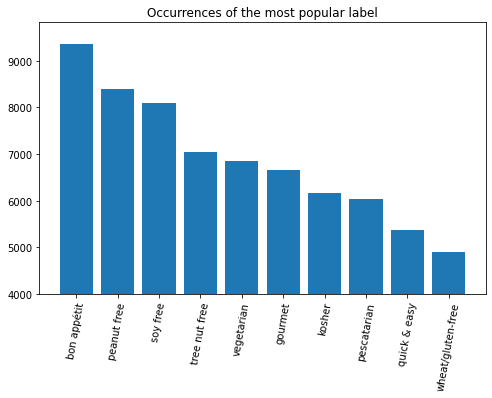

In [183]:
names = list(max_column_dict.keys())
values = list(max_column_dict.values())
fig, ax = plt.subplots(figsize = (8, 5))
ax.bar(range(len(max_column_dict)), values, tick_label=names)
ax.xaxis.set_tick_params(rotation=80)
ax.set_ylim(bottom = 4000)
ax.set_title("Occurrences of the most popular label")
plt.show()

In [184]:
# List of 10 most popular labels
max_column_list = list(max_column_dict.keys())
max_column_list

['bon appétit',
 'peanut free',
 'soy free',
 'tree nut free',
 'vegetarian',
 'gourmet',
 'kosher',
 'pescatarian',
 'quick & easy',
 'wheat/gluten-free']

In [185]:
# The function selects rows containing one of the values, removes duplicates, and then sorts
def proper_columns(df,column_list):
    temp = pd.DataFrame()
    for i in column_list:
        rows_including_value = df[df[i] > 0]
        temp = pd.concat([temp, rows_including_value])
    temp.drop_duplicates(inplace=True)
    temp.sort_index(axis=0, inplace=True)
    return temp

In [186]:
# Select the rows with values from "max_column_list" and remove the rows with null values
frame_including_values_rows_only = proper_columns(df, max_column_list)
frame_including_values_rows_only.dropna(axis=0, inplace=True)
frame_including_values_rows_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13434 entries, 1 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 69.8+ MB


In [187]:
# Select the columns from "max_column_list" and join with the first six numeric columns
short_frame = frame_including_values_rows_only[max_column_list]
short_frame = frame_including_values_rows_only.iloc[:,:6].join(short_frame)
short_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13434 entries, 1 to 20051
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              13434 non-null  object 
 1   rating             13434 non-null  float64
 2   calories           13434 non-null  float64
 3   protein            13434 non-null  float64
 4   fat                13434 non-null  float64
 5   sodium             13434 non-null  float64
 6   bon appétit        13434 non-null  float64
 7   peanut free        13434 non-null  float64
 8   soy free           13434 non-null  float64
 9   tree nut free      13434 non-null  float64
 10  vegetarian         13434 non-null  float64
 11  gourmet            13434 non-null  float64
 12  kosher             13434 non-null  float64
 13  pescatarian        13434 non-null  float64
 14  quick & easy       13434 non-null  float64
 15  wheat/gluten-free  13434 non-null  float64
dtypes: float64(15), object

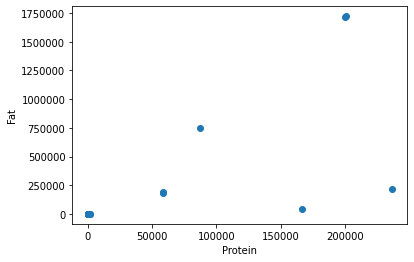

In [188]:
plt.scatter(short_frame['protein'], short_frame['fat'])
plt.ticklabel_format(style='plain')
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.show()

In [189]:
# For proteins and fats, values above 500 are more than 100 times the daily norm for a human, 
#   higher values have been removed
short_frame = short_frame[short_frame.protein < 500]
short_frame = short_frame[short_frame.fat < 500]
short_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13393 entries, 1 to 20051
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              13393 non-null  object 
 1   rating             13393 non-null  float64
 2   calories           13393 non-null  float64
 3   protein            13393 non-null  float64
 4   fat                13393 non-null  float64
 5   sodium             13393 non-null  float64
 6   bon appétit        13393 non-null  float64
 7   peanut free        13393 non-null  float64
 8   soy free           13393 non-null  float64
 9   tree nut free      13393 non-null  float64
 10  vegetarian         13393 non-null  float64
 11  gourmet            13393 non-null  float64
 12  kosher             13393 non-null  float64
 13  pescatarian        13393 non-null  float64
 14  quick & easy       13393 non-null  float64
 15  wheat/gluten-free  13393 non-null  float64
dtypes: float64(15), object

In [190]:
short_frame.head()

,title,rating,calories,protein,fat,sodium,bon appétit,peanut free,soy free,tree nut free,vegetarian,gourmet,kosher,pescatarian,quick & easy,wheat/gluten-free
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Conclusion
The values we have

  * <b>"max_column_dict"</b> - dictionary of the 10 most popular labels along, with the number of their occurrences

  *  <b>"max_column_list"</b> - list of the 10 most popular labels

  *  <b>"frame_including_values_rows_only"</b> - dataFrame with all columns but only rows containing one or more of top 10 label
    
  *  <b>"short_frame"</b> - dataFrame containing only the columns of the top 20 labels and containing at least one value in the row of the top 10 labels


#### Can we assume that the most popular labels receive higher ratings?

In [191]:
# Aggregation function
def rating_count(df,column_list):
    temp = pd.DataFrame()
    for i in column_list:
        rows_including_value = df[df[i] > 0]
        rating_count = rows_including_value.groupby("rating").aggregate({i:"count"})
        rating_count.loc["rating_mean"] = rows_including_value.aggregate({"rating":"mean"})[0]
        rating_count.loc["label_count"] = rows_including_value.aggregate({"rating":"count"})[0]
        rating_count.loc["percent_not_rated"] = [rows_including_value[rows_including_value["rating"] == 0].count() / rating_count.loc["label_count"]][0]
        temp = pd.concat([temp, rating_count], axis=1)
    return temp

In [192]:
# Collecting information on the number of occurrences, average ratings per label, and percentage of unrated
rating_values = rating_count(short_frame, max_column_list).apply(lambda x: round(x,3))
rating_values

,bon appétit,peanut free,soy free,tree nut free,vegetarian,gourmet,kosher,pescatarian,quick & easy,wheat/gluten-free
rating,,,,,,,,,,
0.0,326.000,331.000,319.000,269.000,302.000,260.000,263.000,266.000,165.000,245.000
1.25,28.000,46.000,42.000,37.000,47.000,40.000,41.000,39.000,30.000,31.000
1.875,31.000,29.000,29.000,26.000,36.000,28.000,24.000,23.000,20.000,19.000
2.5,133.000,169.000,162.000,139.000,148.000,149.000,128.000,129.000,100.000,107.000
3.125,439.000,469.000,457.000,389.000,441.000,436.000,382.000,374.000,328.000,284.000
3.75,1762.000,1557.000,1496.000,1322.000,1323.000,1562.000,1165.000,1111.000,1219.000,905.000
4.375,3206.000,2684.000,2603.000,2210.000,2039.000,2125.000,1900.000,1876.000,1578.000,1417.000
5.0,865.000,850.000,821.000,705.000,624.000,507.000,611.000,602.000,328.000,500.000
rating_mean,3.941,3.884,3.887,3.886,3.806,3.824,3.843,3.839,3.839,3.798


In [193]:
# Transpose for easier sorting
rating_values_Transpone = rating_values.transpose()
rating_values_Transpone.sort_values(by=["rating_mean"],ascending=False, inplace=True)
rating_values_Transpone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, bon appétit to wheat/gluten-free
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0.0                10 non-null     float64
 1   1.25               10 non-null     float64
 2   1.875              10 non-null     float64
 3   2.5                10 non-null     float64
 4   3.125              10 non-null     float64
 5   3.75               10 non-null     float64
 6   4.375              10 non-null     float64
 7   5.0                10 non-null     float64
 8   rating_mean        10 non-null     float64
 9   label_count        10 non-null     float64
 10  percent_not_rated  10 non-null     float64
dtypes: float64(11)
memory usage: 960.0+ bytes


In [194]:
def test(list):
    fig, ax = plt.subplots(figsize=(10,8))
    for x in range(len(list)):
        ax.plot(rating_values.index[:-3] , rating_values[max_column_list[x]][:-3], marker="o", linestyle="--")
    ax.legend(list)
    ax.set_ylabel("Rating occurrences")
    ax.set_xlabel("Rating value")
    ax.set_title("Number of rating occurrences, broken down by label")
    plt.show()


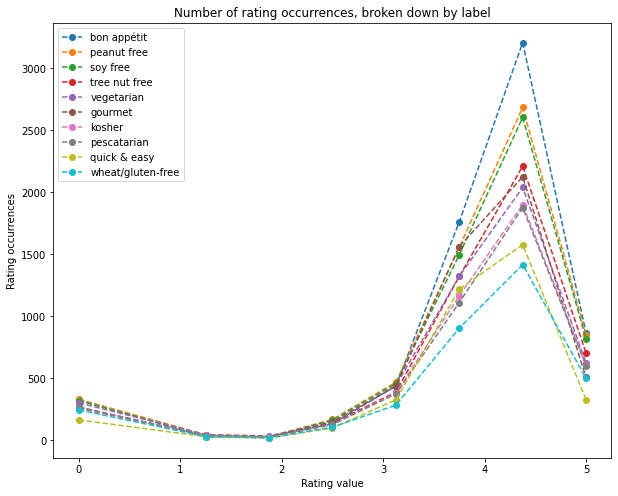

In [195]:
test(max_column_list)

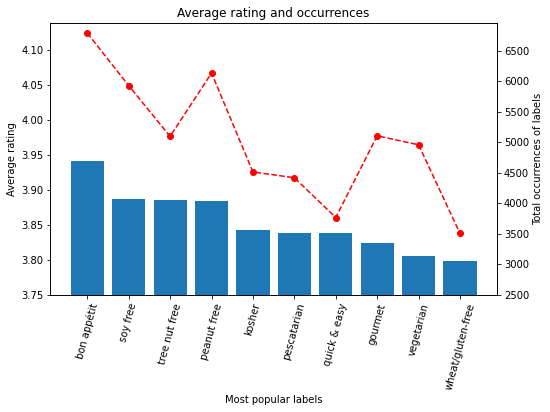

In [196]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(rating_values_Transpone.index, rating_values_Transpone.rating_mean)
ax.set_ylabel("Average rating")
ax.set_xlabel("Most popular labels")
plt.ylim(bottom=3.75)
ax2 = ax.twinx()
ax2.plot(rating_values_Transpone.index, rating_values_Transpone.label_count, color="r", marker="o", linestyle="--")
plt.ylim(bottom=2500)
ax2.set_ylabel("Total occurrences of labels")
ax.xaxis.set_tick_params(rotation= 75)
ax.set_title("Average rating and occurrences")
plt.show()

In [197]:
# Percentage of unrated values in each label
print(rating_values_Transpone["percent_not_rated"]*100)

bon appétit          4.8
soy free             5.4
tree nut free        5.3
peanut free          5.4
kosher               5.8
pescatarian          6.0
quick & easy         4.4
gourmet              5.1
vegetarian           6.1
wheat/gluten-free    7.0
Name: percent_not_rated, dtype: float64


#### Conclusion
We can find some correlation between the number of occurrences of the label in the entire dataset and the average rating, but the correlation between popularity and higher rating is not always present


### Regression:

#### Can we predict that recipes with higher protein and fat will get higher rates?

In [198]:
# Separate only numerical data
numeric_columns_only = short_frame.iloc[:,1:6]
numeric_columns_only.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13393 entries, 1 to 20051
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    13393 non-null  float64
 1   calories  13393 non-null  float64
 2   protein   13393 non-null  float64
 3   fat       13393 non-null  float64
 4   sodium    13393 non-null  float64
dtypes: float64(5)
memory usage: 627.8 KB


<AxesSubplot:>

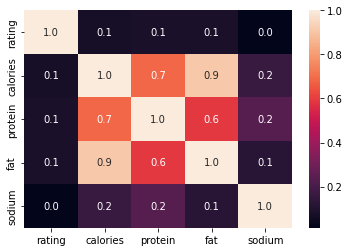

In [199]:
corr = numeric_columns_only.corr()
sns.heatmap(corr, annot=True, fmt=".1f")

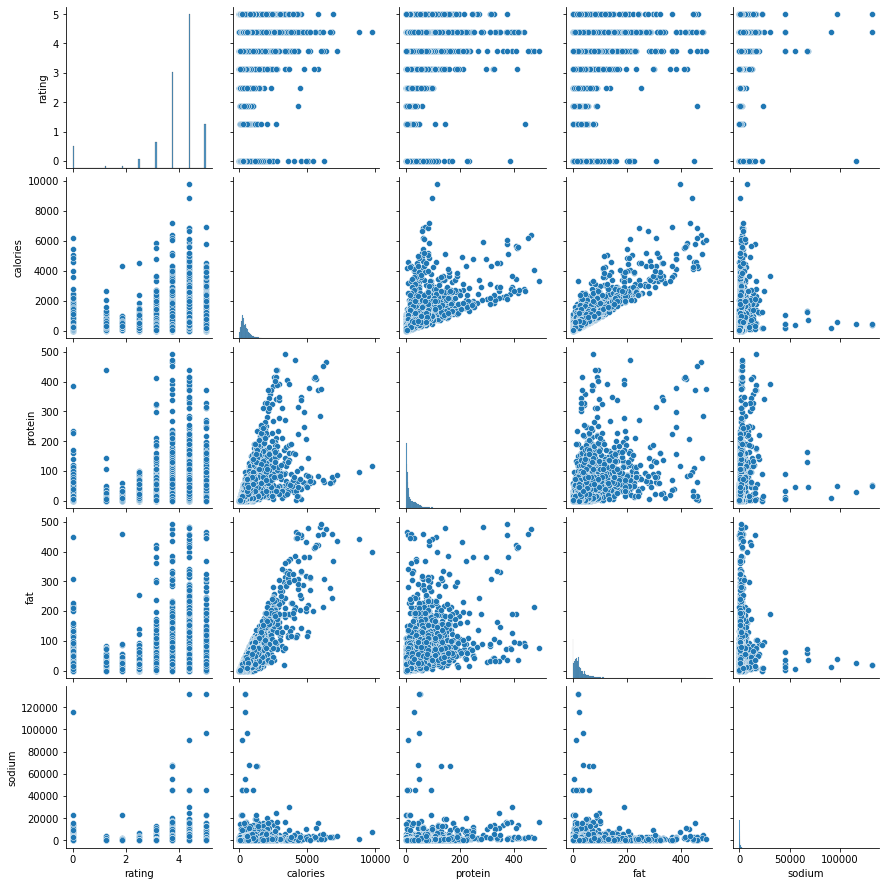

In [200]:
# The correlation between rating, protein and fat are weak
sns.pairplot(numeric_columns_only.iloc[:,:])

In [201]:
# Dependent and independent variables
y = numeric_columns_only["rating"]
X = numeric_columns_only[["protein", "calories"]]

In [202]:
lreg = LinearRegression()

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

In [204]:
lreg.fit(X_train, y_train)

LinearRegression()

In [205]:
y_predict = lreg.predict(X_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

0.008719230003338185
0.7601041866391474


#### Conclusion
The linear regression model is fitted within 0.2%, although the error deviation is 0.75 scores

#### How much calories we will get based on fat and protein ?

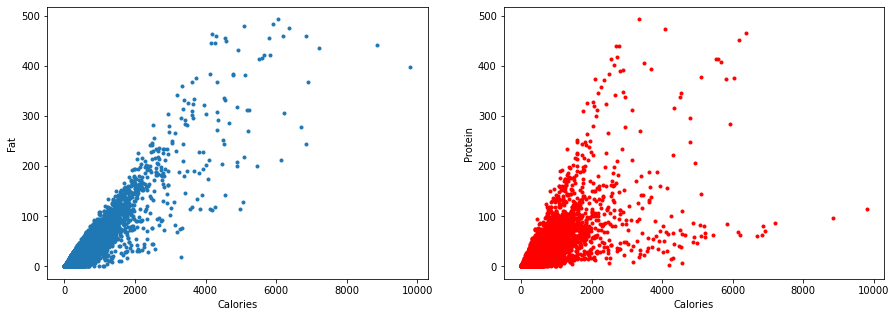

In [206]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(numeric_columns_only.calories, numeric_columns_only.fat, marker='.')
ax[1].scatter(numeric_columns_only.calories, numeric_columns_only.protein, c = 'r', marker='.')
ax[0].set_xlabel("Calories")
ax[1].set_xlabel("Calories")
ax[0].set_ylabel("Fat")
ax[1].set_ylabel("Protein")
plt.show()

On the plot we can see that there is strong correlation between protein fat and calories

In [207]:
# Dependent and independent variables
y = numeric_columns_only["calories"]
X = numeric_columns_only[["protein", "fat"]]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)  

In [209]:
lreg = LinearRegression()

In [210]:
lreg.fit(X_train, y_train)

LinearRegression()

In [211]:
y_predict = lreg.predict(X_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

0.8814815667016309
109.73687386959689


In [212]:
# Linear regression gave good results, now let's try polynomial regression
y = numeric_columns_only["calories"]
X = numeric_columns_only[["protein", "fat"]]

In [213]:
number_degrees = [1, 2, 3, 4, 5, 6, 7, 8]
plt_mean_squared_trained_error = []
plt_mean_squared_test_error = []
plt_mean_absolute_trained_error = []
plt_mean_absolute_test_error = []
plt_r2_score_trained = []
plt_r2_score_test = []

for degree in number_degrees:
    poly_model = PolynomialFeatures(degree=degree)

    poly_x_values = poly_model.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_x_values , y, test_size=0.2, random_state=1, shuffle=False)

    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_train)
    y_pred_test = regression_model.predict(X_test)

    plt_mean_squared_trained_error.append(mean_squared_error(y_train, y_pred, squared=False))
    plt_mean_squared_test_error.append(mean_squared_error(y_test, y_pred_test, squared=False))


    plt_mean_absolute_trained_error.append(mean_absolute_error(y_train, y_pred))
    plt_mean_absolute_test_error.append(mean_absolute_error(y_test, y_pred_test))

    plt_r2_score_trained.append(r2_score(y_train, y_pred))
    plt_r2_score_test.append(r2_score(y_test, y_pred_test))

min_mean_squared_error_test = min(plt_mean_squared_test_error)
min_mean_squared_error_test_index = plt_mean_squared_test_error.index(min_mean_squared_error_test)
min_mean_squared_error_trained = min(plt_mean_squared_trained_error)
min_mean_squared_error_trained_index =  plt_mean_squared_trained_error.index(min_mean_squared_error_trained)

min_mean_absolute_error_test = min(plt_mean_absolute_test_error)
min_mean_absolute_error_test_index = plt_mean_absolute_test_error.index(min_mean_absolute_error_test)
min_mean_absolute_error_trained = min(plt_mean_absolute_trained_error)
min_mean_absolute_error_trained_index = plt_mean_absolute_trained_error.index(min_mean_absolute_error_trained)

max_r2_score_test = max(plt_r2_score_test)
max_r2_score_test_index = plt_r2_score_test.index(max_r2_score_test)
max_r2_score_trained = max(plt_r2_score_trained)
max_r2_score_trained_index = plt_r2_score_trained.index(max_r2_score_trained)

In [214]:
print(plt_mean_squared_test_error)

[191.55849848425203, 189.35019840826786, 192.11920373745417, 191.65219556477246, 183.5516525880643, 181.84076735992903, 326.507911602149, 5003.367689600834]


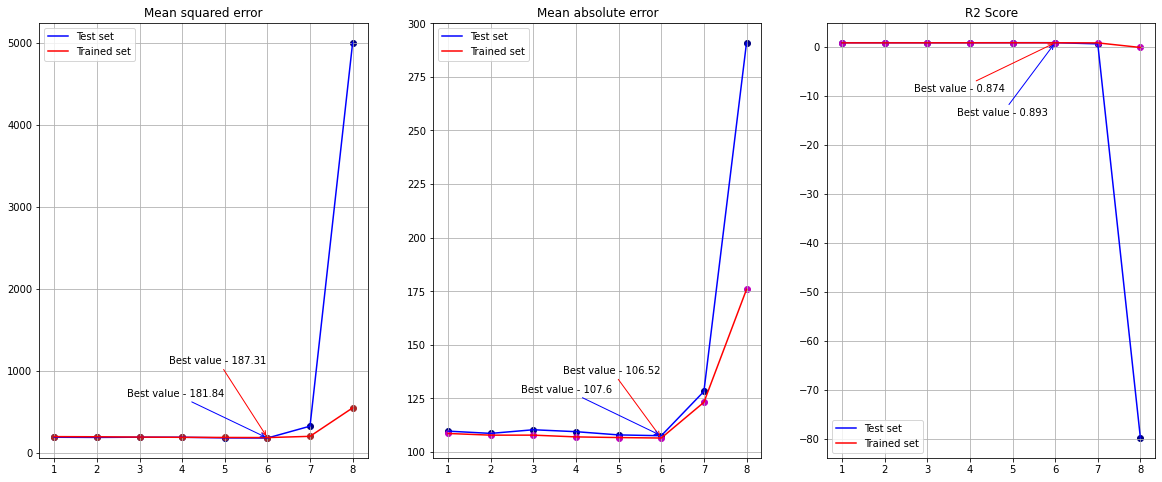

In [257]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].scatter(number_degrees,plt_mean_squared_test_error, color="navy")
ax[0].plot(number_degrees,plt_mean_squared_test_error, color="blue",label= "Test set")
ax[0].scatter(number_degrees,plt_mean_squared_trained_error, color="brown")
ax[0].plot(number_degrees,plt_mean_squared_trained_error, color="red", label= "Trained set") 
ax[0].set_title("Mean squared error")
ax[0].set_xticks(number_degrees)
ax[0].legend()

ax[1].scatter(number_degrees,plt_mean_absolute_test_error, color="navy")
ax[1].plot(number_degrees,plt_mean_absolute_test_error, color="blue",label= "Test set")
ax[1].scatter(number_degrees,plt_mean_absolute_trained_error, color="m")
ax[1].plot(number_degrees,plt_mean_absolute_trained_error, color="red", label= "Trained set") 
ax[1].set_title("Mean absolute error")
ax[1].set_xticks(number_degrees)
ax[1].legend()

ax[2].scatter(number_degrees,plt_r2_score_test, color="navy")
ax[2].plot(number_degrees,plt_r2_score_test, color="blue",label= "Test set")
ax[2].scatter(number_degrees,plt_r2_score_trained, color="m")
ax[2].plot(number_degrees,plt_r2_score_trained, color="red" , label= "Trained set") 
ax[2].set_title("R2 Score")
ax[2].set_xticks(number_degrees)

ax[2].legend()
# Collab may give different values than the local machine, so different notations must be used

# Local machine
#ax[0].annotate(f"Best value - {round(min_mean_squared_error_test, 2)}", xy=[min_mean_squared_error_test_index + 1, min_mean_squared_error_test], xytext=(min_mean_squared_error_test_index - 3.1, min_mean_squared_error_test + 75), arrowprops={"arrowstyle":"->", "color":"blue"})
#ax[0].annotate(f"Best value - {round(min_mean_squared_error_trained, 2)}", xy=[min_mean_squared_error_trained_index + 1, min_mean_squared_error_trained], xytext=(min_mean_squared_error_trained_index - 2, min_mean_squared_error_trained + 130), arrowprops={"arrowstyle":"->", "color":"red"})
#ax[1].annotate(f"Best value - {round(min_mean_absolute_error_trained, 2)}", xy=[min_mean_absolute_error_trained_index + 1, min_mean_absolute_error_trained], xytext=(min_mean_absolute_error_trained_index - 1.3, min_mean_absolute_error_trained + 25), arrowprops={"arrowstyle":"->", "color":"red"})
#ax[1].annotate(f"Best value - {round(min_mean_absolute_error_test, 2)}", xy=[min_mean_absolute_error_test_index + 1, min_mean_absolute_error_test], xytext=(min_mean_absolute_error_test_index - 3, min_mean_absolute_error_test + 15), arrowprops={"arrowstyle":"->", "color":"blue"})
#ax[2].annotate(f"Best value - {round(max_r2_score_trained, 3)}", xy=[max_r2_score_trained_index + 1, max_r2_score_trained], xytext=(max_r2_score_trained_index - 3, max_r2_score_trained - 0.20), arrowprops={"arrowstyle":"->", "color":"red"})
#ax[2].annotate(f"Best value - {round(max_r2_score_test, 3)}", xy=[max_r2_score_test_index + 1, max_r2_score_test], xytext=(max_r2_score_test_index - 2 , max_r2_score_test - 0.35), arrowprops={"arrowstyle":"->", "color":"blue"})

# Collab
ax[0].annotate(f"Best value - {round(min_mean_squared_error_trained, 2)}", xy=[min_mean_squared_error_trained_index + 1, min_mean_squared_error_trained], xytext=(min_mean_squared_error_trained_index - 1.3 , min_mean_squared_error_trained + 900), arrowprops={"arrowstyle":"->", "color":"red"})
ax[0].annotate(f"Best value - {round(min_mean_squared_error_test, 2)}", xy=[min_mean_squared_error_test_index + 1, min_mean_squared_error_test], xytext=(min_mean_squared_error_test_index - 2.3, min_mean_squared_error_test + 500), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[1].annotate(f"Best value - {round(min_mean_absolute_error_trained, 2)}", xy=[min_mean_absolute_error_trained_index + 1, min_mean_absolute_error_trained], xytext=(min_mean_absolute_error_trained_index - 1.3, min_mean_absolute_error_trained + 30), arrowprops={"arrowstyle":"->", "color":"red"})
ax[1].annotate(f"Best value - {round(min_mean_absolute_error_test, 2)}", xy=[min_mean_absolute_error_test_index + 1, min_mean_absolute_error_test], xytext=(min_mean_absolute_error_test_index - 2.3, min_mean_absolute_error_test + 20), arrowprops={"arrowstyle":"->", "color":"blue"})
ax[2].annotate(f"Best value - {round(max_r2_score_trained, 3)}", xy=[max_r2_score_trained_index + 1, max_r2_score_trained], xytext=(max_r2_score_trained_index - 2.3, max_r2_score_trained - 10), arrowprops={"arrowstyle":"->", "color":"red"})
ax[2].annotate(f"Best value - {round(max_r2_score_test, 3)}", xy=[max_r2_score_test_index + 1, max_r2_score_test], xytext=(max_r2_score_test_index - 1.3 , max_r2_score_test - 15), arrowprops={"arrowstyle":"->", "color":"blue"})

plt.show()

In [216]:
# All metrics indicated that degree 6 achieved the best results
y = numeric_columns_only["calories"]
X = numeric_columns_only[["protein", "fat"]]

In [217]:
poly = PolynomialFeatures(degree=6)
X_poly_temp = pd.DataFrame(poly.fit_transform(X))
c = poly.get_feature_names_out().tolist()
X_poly_temp.columns = [c]
X_poly_temp

,1,protein,fat,protein^2,protein fat,fat^2,protein^3,protein^2 fat,protein fat^2,fat^3,...,protein^2 fat^3,protein fat^4,fat^5,protein^6,protein^5 fat,protein^4 fat^2,protein^3 fat^3,protein^2 fat^4,protein fat^5,fat^6
0,1.0,18.0,23.0,324.0,414.0,529.0,5832.0,7452.0,9522.0,12167.0,...,3942108.0,5037138.0,6.436343e+06,3.401222e+07,4.346006e+07,5.553230e+07,7.095794e+07,9.066848e+07,1.158542e+08,1.480359e+08
1,1.0,6.0,7.0,36.0,42.0,49.0,216.0,252.0,294.0,343.0,...,12348.0,14406.0,1.680700e+04,4.665600e+04,5.443200e+04,6.350400e+04,7.408800e+04,8.643600e+04,1.008420e+05,1.176490e+05
2,1.0,20.0,32.0,400.0,640.0,1024.0,8000.0,12800.0,20480.0,32768.0,...,13107200.0,20971520.0,3.355443e+07,6.400000e+07,1.024000e+08,1.638400e+08,2.621440e+08,4.194304e+08,6.710886e+08,1.073742e+09
3,1.0,19.0,79.0,361.0,1501.0,6241.0,6859.0,28519.0,118579.0,493039.0,...,177987079.0,740051539.0,3.077056e+09,4.704588e+07,1.956118e+08,8.133334e+08,3.381755e+09,1.406098e+10,5.846407e+10,2.430875e+11
4,1.0,7.0,10.0,49.0,70.0,100.0,343.0,490.0,700.0,1000.0,...,49000.0,70000.0,1.000000e+05,1.176490e+05,1.680700e+05,2.401000e+05,3.430000e+05,4.900000e+05,7.000000e+05,1.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,1.0,2.0,2.0,4.0,4.0,4.0,8.0,8.0,8.0,8.0,...,32.0,32.0,3.200000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01
13389,1.0,22.0,28.0,484.0,616.0,784.0,10648.0,13552.0,17248.0,21952.0,...,10624768.0,13522432.0,1.721037e+07,1.133799e+08,1.443017e+08,1.836567e+08,2.337449e+08,2.974935e+08,3.786281e+08,4.818903e+08
13390,1.0,31.0,38.0,961.0,1178.0,1444.0,29791.0,36518.0,44764.0,54872.0,...,52731992.0,64639216.0,7.923517e+07,8.875037e+08,1.087908e+09,1.333564e+09,1.634692e+09,2.003816e+09,2.456290e+09,3.010936e+09
13391,1.0,45.0,24.0,2025.0,1080.0,576.0,91125.0,48600.0,25920.0,13824.0,...,27993600.0,14929920.0,7.962624e+06,8.303766e+09,4.428675e+09,2.361960e+09,1.259712e+09,6.718464e+08,3.583181e+08,1.911030e+08


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_temp, y, test_size=0.2, random_state=1, shuffle=False)

In [219]:
lreg = LinearRegression()
lreg.fit(X_train.values, y_train)

LinearRegression()

In [220]:
y_predict = lreg.predict(X_test.values)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

0.893201398851174
107.59673315163361


#### Conclusion
r2 score = 0.89
mean absolute error = 107.6

### Decision tree

#### Can we predict that recipes with higher protein and fat will get higher rates?

In [221]:
# # Dependent and independent variables
y = numeric_columns_only["rating"]
X = numeric_columns_only[["protein", "calories"]]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1, shuffle=False)

In [223]:
# Find best parameters for model
model = DecisionTreeRegressor()
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(5, 100, 2)
                                },
                  cv=10,
                  scoring='r2') #'neg_mean_absolute_error'
gs.fit(X_train,y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 2, 'min_samples_split': 5}
-0.025014992046175254


Best parameters are:
    - max_depth = 2
    - min_sample_splits = 5

In [224]:
# Build model
model = DecisionTreeRegressor(max_depth=2, min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=5)

In [225]:
y_predict_test = model.predict(X_test)
print(r2_score(y_test, y_predict_test))
print(mean_absolute_error(y_test, y_predict_test))

0.03627660741769756
0.760051561417327


#### Conclusion
The model has a poor fit within 0.3%, although the deviation error is 0.76

#### How much calories we will get based on fat and protein ?

In [226]:
# Dependent and independent variables
y = numeric_columns_only["calories"]
X = numeric_columns_only[["protein", "fat"]]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

In [228]:
dtr = DecisionTreeRegressor()

In [229]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [230]:
y_predict = dtr.predict(X_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

0.7469350385198441
127.23716811987781


In [231]:
# Find best parameters for model
dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(5, 110, 2)
                                },
                  cv=10,
                  scoring= 'neg_mean_absolute_error' ) #
gs.fit(X_train,y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 17}
104.48824558534861


Best values for decision tree 
  * max_depth = 9
  * min_sample_split = 17

In [232]:
dtr = DecisionTreeRegressor(max_depth=9, min_samples_split=17)

In [233]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_split=17)

In [ ]:
fig = plt.figure(figsize=(50,40), dpi =50)
tree_plot= tree.plot_tree(dtr, feature_names=X.columns, filled=True)

In [234]:
y_predict = dtr.predict(X_test)
print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))

0.8456430533940296
111.11044849175697


#### Conclusion
r2 score = 0.84
mean absolute error = 111.1
In this case decision tree has slightly worse performance than polynomial regression